# Title of Experiment [ex. Vision Transformer on CIFAR-10 Dataset]
*Author: Your Name*

## Objective
The goal of this notebook is to apply the `[model_name]` model on the CIFAR-10 dataset. 

## Resources
* **About `[model_name]`:**
[insert blurb about model]

* **About CIFAR-10**
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. http://www.cs.toronto.edu/~kriz/cifar.html

## 1.) Import packages and notebook settings

In [12]:
# requisite imports
import torch 
import tqdm
import os
import timeit

import torchvision
import torchvision.transforms.v2 as transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

import torch.optim as optim
import numpy as np
import random


**Device setting**: Devices with MPS available will use MPS, cuda will use cuda, and if both are not available, `device` is set to CPU.

In [13]:
device = torch.device('mps' if torch.backends.mps.is_available() else ('cuda:0' if torch.cuda.is_available() else 'cpu'))
print(device)

mps


**Seed Setting**:
Different sources of randomness contribute to the result of a neural network model. Nevertheless, a good neural network model should not depend on the eed but the data, architecture, and hyperparameters used. We introduce a seed value for the sake of reproducibility of our results. We set the `seed_value` to `42` for the following sources of randomness:
1. within the environment
2. within Python
3. within some packages like numpy and torch
4. and anywhere else where randomness is introduced like within architectures (some dropout layers introduce randomness) 


In [14]:
seed_value = 42

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` and `torch` pseudo-random generator at a fixed value
np.random.seed(seed_value)
torch.manual_seed(seed_value)

**Variable setting**

In [15]:
BATCH_SIZE = 64
NUM_EPOCHS = 5
LR = 2E-5

# 2.) Load and Transform CIFAR-10 dataset

The CIFAR-10 dataset is popular enough that `torchvision.datasets` has CIFAR-10 as one of its built-in datasets. https://pytorch.org/vision/stable/datasets.html#datasets

In [20]:
# Load the CIFAR train dataset
train = torchvision.datasets.CIFAR10("data/", train=True, download=True)
test = torchvision.datasets.CIFAR10("data/", train=False, download=True) 

100%|██████████| 170498071/170498071 [00:08<00:00, 20240527.86it/s]


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


**Transform**: Transforming a dataset when loading it is an important and common practice in computer vision. It is used for the following:
* *Data augmentation*: Increase the size and diversity of dataset, which can improve model performance. For ex., flip, rotate or crop images to create new images.
* *Normalization*: Normalize the distribution of hte pixel values, making the data easier for the model to learn.
* *Preprocessing*: Prepare data for a specific model, like perhaps you need to resize the images or convert them to another format.

Note: You can skip `transform` but it is not recommended. It may lead to overfitting, poor performance, or incompatibility of the data with the model you're using.

Resource on transformation: https://pytorch.org/vision/main/transforms.html

To start, I chose *normalization* for transformation.

In [21]:
# print(train.data) #train.data is of type numpy array 
# normalize train.data by dividing the array by 255. This will normalize all of the pixel values in the array between 0 and 1. 
# 255 is the max value for a pixel in a typical image.
normalized_train = train.data / 255
mean = normalized_train.mean(axis = (0,1,2))
std = normalized_train.std(axis = (0,1,2))
print(f"train mean: {mean}, train std: {std}")

train mean: [0.49139968 0.48215841 0.44653091], train std: [0.24703223 0.24348513 0.26158784]


We will feed these `mean` and `std` to the `transforms.v2.Compose()`

In [22]:
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(), transforms.Normalize(mean, std)])

# reload our train and test sets with transformation
train = torchvision.datasets.CIFAR10("data/", train=True, download=False, transform=transform) 
test = torchvision.datasets.CIFAR10("data/", train=True, download=False, transform=transform) 

# size of the validation set
val_size = 10000

# size of the train set
train_size = len(train) - val_size

# split the train into a train and a validation set, in accordance to the determined train and val sizes
generator1 = torch.Generator().manual_seed(42) # keeps the split the same
train, val = random_split(train, [train_size, val_size], generator1)

# load the train, test, and val to our dataloader
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val, batch_size=BATCH_SIZE, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


**Visualizing images**

In [23]:
def imshow(img):
    img_np = img.numpy()
    img_np = img_np / 2 + 0.5 # unnormalize image
    plt.axis('off')
    plt.imshow(np.transpose(img_np, (1,2,0)))
    plt.show
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane frog horse horse cat car bird dog frog plane cat truck dog dog ship car truck truck cat plane ship frog car cat car frog bird frog cat deer dog dog car ship plane frog car truck deer horse deer frog deer bird frog plane frog dog deer dog frog ship deer bird car dog horse frog plane cat bird bird plane horse


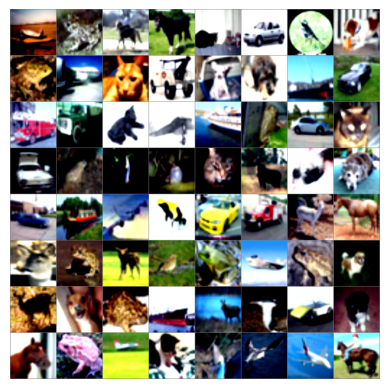

In [26]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(BATCH_SIZE)))

## DataLoad

## Model

## Train

## Test

## Data Save
